In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from synutility.SynIO.data_type import load
from synutility.SynVis.graph_visualizer import GraphVisualizer
from typing import Tuple, Dict, List, Callable
import time
import pandas as pd
import numpy as np
from numpy.linalg import matrix_rank

In [3]:
data = load('data/ITS_largerdataset.pkl.gz')
# data = load('data/ITS_graphs.pkl.gz')

In [4]:
# RID_KEY = 'R-id' # used in small dataset
RID_KEY = 'R_ID' # used in big dataset

In [5]:
# WP 1: find reaction center

In [6]:
# WP 1: calculate all reaction centers

L_DEPTH = 1

In [7]:
data[0]

{'ITS': <networkx.classes.graph.Graph at 0x2054b52c690>,
 'RC': <networkx.classes.graph.Graph at 0x205c2ddf450>,
 'R_ID': 'R_947167'}

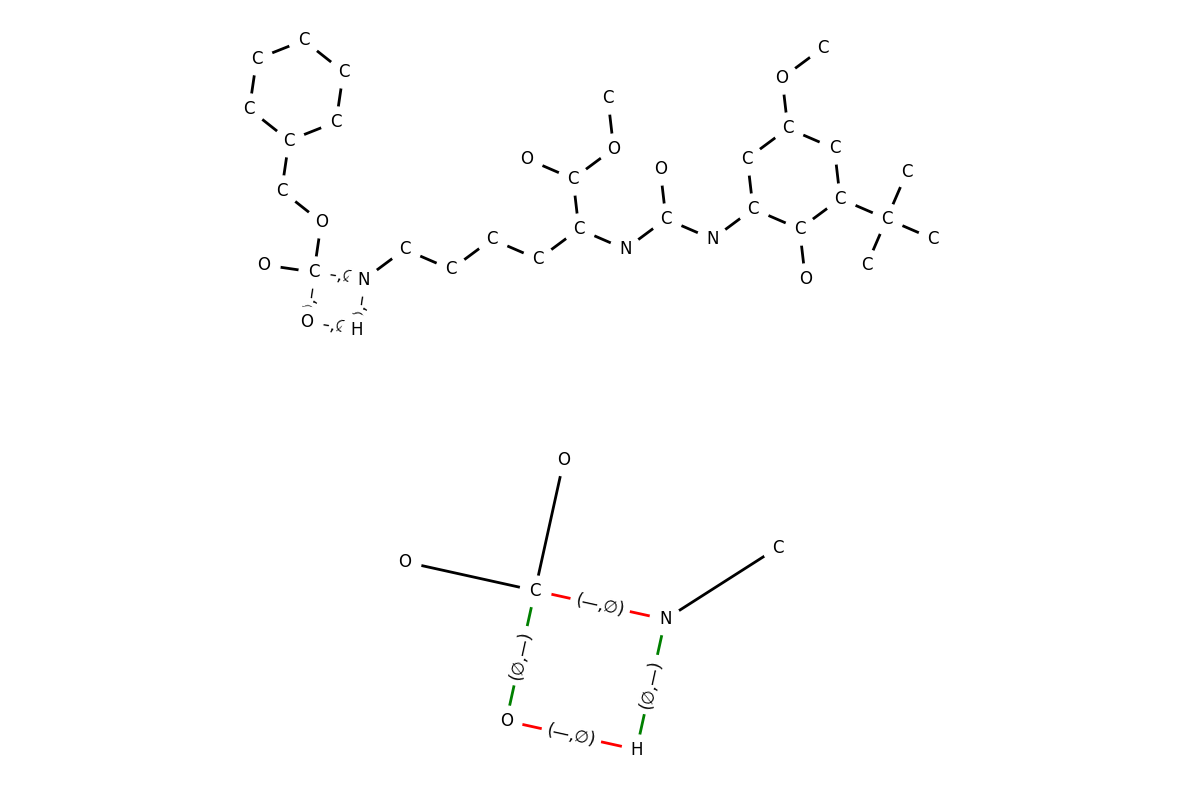

In [8]:
its_graph = data[0]['ITS']
reaction_center = data[0]['RC']

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
vis = GraphVisualizer()

# Plot ITS graph and its reaction center
vis.plot_its(its_graph, ax[0], use_edge_color=True)
vis.plot_its(reaction_center, ax[1], use_edge_color=True)

# Display the plots
plt.show()

In [258]:
# WP 2:



In [259]:
# clusters, _ = isomorphism_clustering({"trivial_cluster" : data})
# print(len(clusters))
# clusters

In [260]:
# first_cluster = next(iter(clusters.values()))
# 
# rc1 = first_cluster[0]['RC']
# rc2 = first_cluster[1]['RC']
# 
# fig, ax = plt.subplots(2, 1, figsize=(15, 10))
# vis = GraphVisualizer()
# 
# # Plot ITS graph and its reaction center
# vis.plot_its(rc1, ax[0], use_edge_color=True)
# vis.plot_its(rc2, ax[1], use_edge_color=True)
# 
# # Display the plots
# plt.show()

In [261]:
len(data)

1020026

In [262]:
# WP 3:

# WP 4 (Version A):

invariant_functions = {
    "none": lambda G: "trivial_cluster",
#    "vertex_count": vertex_count,
#    "edge_count": edge_count,
#    "vertex_degrees": vertex_degrees,
#    "algebraic_connectivity": algebraic_connectivity,
#    "rank": rank,
    "weisfeiler_lehman_graph_hash_(1)": lambda G: weisfeiler_lehman_graph_hash(G, 1),
#    "weisfeiler_lehman_graph_hash_(2)": lambda G: weisfeiler_lehman_graph_hash(G, 2),
    "weisfeiler_lehman_graph_hash_(3)": lambda G: weisfeiler_lehman_graph_hash(G, 3),
#    "weisfeiler_lehman_graph_hash_no_attributes_(1)": lambda G: weisfeiler_lehman_graph_hash_no_attributes(G, 1),
}

In [264]:
# graph_invariants

In [265]:
for key, value in graph_invariants.items():
    print(f"{key}:  {value['execution_time_ms']:6f} ms")

none:  1032.582998 ms
vertex_count:  1299.736738 ms
edge_count:  5431.820869 ms
vertex_degrees:  5039.431334 ms
rank:  55273.048639 ms
weisfeiler_lehman_graph_hash_(1):  38479.166746 ms
weisfeiler_lehman_graph_hash_(2):  62904.536247 ms
weisfeiler_lehman_graph_hash_(3):  85484.311342 ms


In [266]:
# Define invariant combinations to examine

# TODO weisfeiler lehman test iteration count variable depending on node count in cluster?
invariant_combinations = [(invariant, ) for invariant in graph_invariants.keys()]
invariant_combinations.append(("vertex_count", "edge_count"))

In [267]:
# Calculate clusters for the different invariant combinations

def calculate_invariant_cluster(
        graph_invariants: dict[str, dict[str, ...]],
        invariant_combination: list[str],
): # TODO type hint, revisit code and check if correct
    start_time = time.time()
    
    clusters = dict()
    total_execution_time_ms = 0
    
    invariant_aggregation = dict()
    
    for invariant_name in invariant_combination:
        total_execution_time_ms += graph_invariants[invariant_name]['execution_time_ms']

        for r_id, invariant_value in graph_invariants[invariant_name]["reactions"].items():
            
            if r_id not in invariant_aggregation:
                invariant_aggregation[r_id] = []
            
            invariant_aggregation[r_id].append(graph_invariants[invariant_name]['reactions'][r_id])
    
    for r_id, invariant_value in invariant_aggregation.items():
        invariant_tuple = tuple(invariant_value)
    
        if invariant_tuple not in clusters:
            clusters[invariant_tuple] = []
                                                                
        clusters[invariant_tuple].append(reaction)
    
    end_time = time.time()
    total_execution_time_ms += (end_time - start_time) * 1000
    return clusters, total_execution_time_ms    


In [268]:
cluster_benchmarks = dict()

for key, value in invariant_clusters.items():

    clusters = value['clusters']
    isomorphism_execution_time_ms = value['execution_time_ms']
    cluster_variance = 0
    for cluster in clusters.values():
        cluster_variance += len(cluster) ** 2
        
    benchmark_key = '+'.join(key)

    cluster_benchmarks[benchmark_key] = {
        "prefilter_execution_time_ms": isomorphism_execution_time_ms,
        "prefilter_num_clusters": len(clusters),
        "prefilter_num_clusters/ms": (len(clusters) / isomorphism_execution_time_ms),
        "prefilter_variance": cluster_variance,
        "prefilter_variance/ms": (cluster_variance / isomorphism_execution_time_ms)
    }

In [269]:
benchmark_df = pd.DataFrame.from_dict(cluster_benchmarks, orient="columns").T
benchmark_df


,prefilter_execution_time_ms,prefilter_num_clusters,prefilter_num_clusters/ms,prefilter_variance,prefilter_variance/ms
none,1032.582998,1.0,0.000968,1.040453e+12,1.007622e+09
vertex_count,1299.736738,18.0,0.013849,2.624662e+11,2.019380e+08
edge_count,5431.820869,20.0,0.003682,2.387827e+11,4.395996e+07
vertex_degrees,5039.431334,321.0,0.063698,1.646423e+11,3.267080e+07
rank,55273.048639,15.0,0.000271,6.509716e+11,1.177738e+07
weisfeiler_lehman_graph_hash_(1),38479.166746,2757.0,0.071649,1.299389e+10,3.376863e+05
weisfeiler_lehman_graph_hash_(2),62904.536247,2759.0,0.043860,1.299381e+10,2.065640e+05
weisfeiler_lehman_graph_hash_(3),85484.311342,2760.0,0.032287,1.299378e+10,1.520019e+05
vertex_count+edge_count,6731.557608,73.0,0.010844,2.229524e+11,3.312048e+07


In [270]:
invariant_combinations_to_isomorphism_check = [
#    ("none", ),
#    ("vertex_degrees", ),
    ("weisfeiler_lehman_graph_hash_(1)", ),
    ("weisfeiler_lehman_graph_hash_(3)", ),
]

In [271]:
for invariant_combination in invariant_combinations_to_isomorphism_check:
    invariant_cluster = invariant_clusters[invariant_combination]
    prefiltered_clusters = invariant_cluster["clusters"]
    
    start_time = time.time()

    isomorphism_clusters, isomorphism_check_count = isomorphism_clustering(prefiltered_clusters)

    end_time = time.time()
    
    invariant_cluster['isomorphism_execution_time_ms'] = (end_time - start_time) * 1000
    invariant_cluster['isomorphism_clusters'] = isomorphism_clusters
    invariant_clusters['isomorphism_check_count'] = isomorphism_check_count
    

In [272]:
for key in invariant_combinations_to_isomorphism_check:
    
    value = invariant_clusters[key]

    clusters = value['isomorphism_clusters']
    isomorphism_execution_time_ms = value['isomorphism_execution_time_ms']
        
    benchmark_key = '+'.join(key)
    prefilter_execution_time_ms = cluster_benchmarks[benchmark_key]["prefilter_execution_time_ms"]
    total_execution_time_ms = prefilter_execution_time_ms + isomorphism_execution_time_ms

    num_clusters = len(clusters)
    cluster_benchmarks[benchmark_key].update({
        "isomorphism_execution_time_ms": isomorphism_execution_time_ms,
        "isomorphism_num_clusters": num_clusters,
        "total_execution_time_ms": total_execution_time_ms,
    })

In [273]:
benchmark_df = pd.DataFrame.from_dict(cluster_benchmarks, orient="columns").T.dropna()
benchmark_df

,prefilter_execution_time_ms,prefilter_num_clusters,prefilter_num_clusters/ms,prefilter_variance,prefilter_variance/ms,isomorphism_execution_time_ms,isomorphism_num_clusters,total_execution_time_ms
weisfeiler_lehman_graph_hash_(1),38479.166746,2757.0,0.071649,1.299389e+10,337686.335095,156564.776182,2760.0,195043.942928
weisfeiler_lehman_graph_hash_(3),85484.311342,2760.0,0.032287,1.299378e+10,152001.933454,175244.861603,2760.0,260729.172945


In [274]:
# WP 4 (Version B):

NUM_ITERATIONS = 10

node_hash_table = dict()
next_table_hash = 2

hash_clusters = dict()

# Step 1: Set base hash to 1

for reaction in data:

    G = reaction['RC']

    for node in G.nodes():
            
        G.nodes[node][f'hash_0'] = 1

hash_clusters['iteration_0'] = {
    '1': data
}

# Step 2: 

for i in range(1, NUM_ITERATIONS + 1):

    # Setup iteration cluster

    hash_clusters[f'iteration_{i}'] = dict()
    
    previous_iteration_hash_clusters = hash_clusters[f'iteration_{i - 1}']
    iteration_hash_clusters = hash_clusters[f'iteration_{i}']

    
    for cluster in previous_iteration_hash_clusters.values():

        # Calculate hashes:
        for reaction in cluster:

            G = reaction['RC']

            for node, node_data in G.nodes(data=True):

                hash = node_data.get(f'hash_{i - 1}')
                neighbor_hashes = []

                for neighbor in G.neighbors(node):
                    neighbor_hashes.append(G.nodes[neighbor][f'hash_{i - 1}'])

                neighbor_hashes_tuple = tuple(neighbor_hashes)

                new_hash_key = (hash, neighbor_hashes_tuple)

                if new_hash_key not in node_hash_table:
                    
                    node_hash_table[new_hash_key] = next_table_hash
                    next_table_hash += 1

                G.nodes[node][f'hash_{i}'] = node_hash_table[new_hash_key]      
                
        # Cluster:
        for reaction in cluster:
            
            G = reaction['RC']


            hash_multiset = tuple(sorted([node_data[f'hash_{i}'] for _, node_data in G.nodes(data=True)]))

            if hash_multiset not in iteration_hash_clusters:
                
                iteration_hash_clusters[hash_multiset] = [reaction]

            else:

                iteration_hash_clusters[hash_multiset].append(reaction)


In [1]:
for i in range(1, NUM_ITERATIONS + 1):
    print(len(hash_clusters[f'iteration_{i}']))

NameError: name 'NUM_ITERATIONS' is not defined

In [2]:
x = [1,2]

In [3]:
list(zip(x,x,x))

[(1, 1, 1), (2, 2, 2)]